In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk(r'D:\Mini\project\dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


D:\Mini\project\dataset\Bird-drop\Bird (1).jpeg
D:\Mini\project\dataset\Bird-drop\Bird (10).jpg
D:\Mini\project\dataset\Bird-drop\Bird (100).jpg
D:\Mini\project\dataset\Bird-drop\Bird (101).jpg
D:\Mini\project\dataset\Bird-drop\Bird (102).jpg
D:\Mini\project\dataset\Bird-drop\Bird (103).jpg
D:\Mini\project\dataset\Bird-drop\Bird (104).jpg
D:\Mini\project\dataset\Bird-drop\Bird (105).jpg
D:\Mini\project\dataset\Bird-drop\Bird (106).jpg
D:\Mini\project\dataset\Bird-drop\Bird (107).jpg
D:\Mini\project\dataset\Bird-drop\Bird (108).jpg
D:\Mini\project\dataset\Bird-drop\Bird (109).jpg
D:\Mini\project\dataset\Bird-drop\Bird (11).jpg
D:\Mini\project\dataset\Bird-drop\Bird (110).jpg
D:\Mini\project\dataset\Bird-drop\Bird (111).jpg
D:\Mini\project\dataset\Bird-drop\Bird (112).jpg
D:\Mini\project\dataset\Bird-drop\Bird (113).jpg
D:\Mini\project\dataset\Bird-drop\Bird (114).jpg
D:\Mini\project\dataset\Bird-drop\Bird (115).jpg
D:\Mini\project\dataset\Bird-drop\Bird (116).jpg
D:\Mini\project\dataset

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import tensorflow as tf
import random
from cv2 import resize
from glob import glob

import warnings
warnings.filterwarnings("ignore")

c:\Users\gagan aditya\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
r=r'D:\Mini\project\dataset'
files=[]
filess=np.load('/kaggle/input/list-images-input/files.npy')
for i in filess:
    s=i.replace('/content/drive/MyDrive/dataset',r)
    files.append(s)

In [3]:
b,c,d,e,p,s=[],[],[],[],[],[]
for i in files:
    if 'Bird' in i:
        b.append(i)
    elif 'Clean' in i:
        c.append(i)
    elif 'Dust' in i:
        d.append(i)
    elif 'Electrical' in i:
        e.append(i)
    elif 'Physical' in i:
        p.append(i)
    elif 'Snow' in i:
        s.append(i)
l=[]
l.append(b)
l.append(c)
l.append(d)
l.append(e)
l.append(p)
l.append(s)
train,test=[],[]
# print(l)
for i in l:
    n=len(i)
    trn=round(n*0.8)
    train+=i[:trn]
    test+=i[trn:]

train=np.array(train)
test=np.array(test)
print(train[:5])

['/kaggle/input/input1/Faulty_solar_panel/Bird-drop/Bird (1).jpeg'
 '/kaggle/input/input1/Faulty_solar_panel/Bird-drop/Bird (10).jpg'
 '/kaggle/input/input1/Faulty_solar_panel/Bird-drop/Bird (100).jpg'
 '/kaggle/input/input1/Faulty_solar_panel/Bird-drop/Bird (101).jpg'
 '/kaggle/input/input1/Faulty_solar_panel/Bird-drop/Bird (102).jpg']


In [4]:
x_train,y_train=[],[]
d={'Bird':0, 'Clean':1, 'Dust':2, 'Electrical':3, 'Physical':4, 'Snow':5}
for img_path in train:
        img=cv2.imread(img_path)
        try:
            # gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(img,(224, 224))
            x_train.append(resized)
            y_train.append(d[img_path.split(".")[0].split(" ")[0].split("/")[-1]])
        except Exception as e:
            print('Exception:',e)

Exception: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [5]:
x_train=np.array(x_train)
x_train[0].shape

(224, 224, 3)

In [6]:
x_test,y_test=[],[]
d={'Bird':0, 'Clean':1, 'Dust':2, 'Electrical':3, 'Physical':4, 'Snow':5}

for img_path in test:
        img=cv2.imread(img_path)
        try:
            # gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(img,(224, 224))
            x_test.append(resized)
            y_test.append(d[img_path.split(".")[0].split(" ")[0].split("/")[-1]])
        except Exception as e:
            print('Exception:',e)

Exception: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



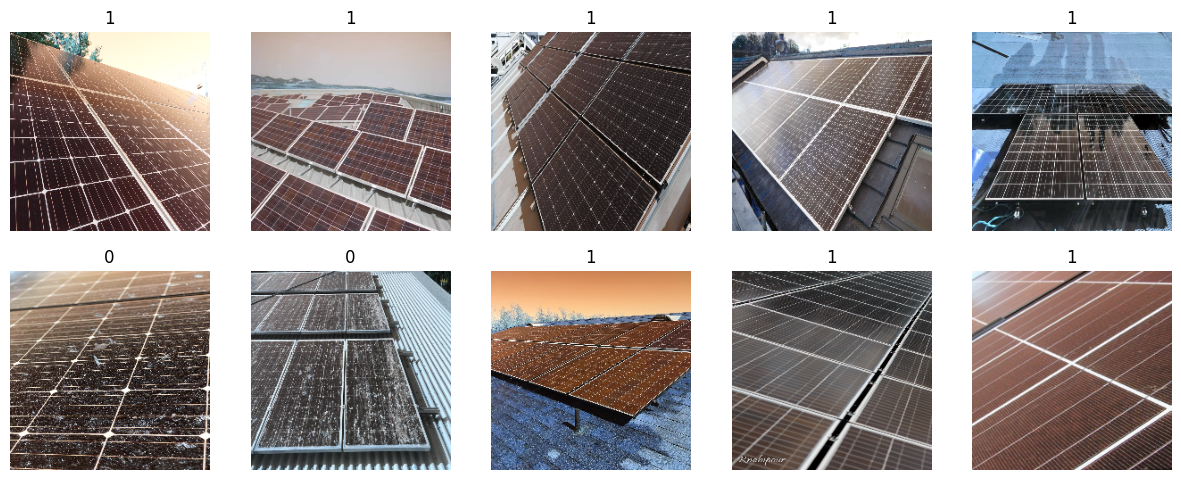

In [8]:
plt.figure(figsize=(15, 15))
for i in range(35,45):
        ax = plt.subplot(5, 5,(i%10)+1)
        plt.imshow(x_test[i])
        plt.title(y_test[i])
        plt.axis("off")

In [9]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224,3)
)
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [10]:
inputs = tf.keras.Input(shape=(224, 224,3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
x=  tf.keras.layers.Dense(256,activation='relu')(x)
x=  tf.keras.layers.Dense(128,activation='relu')(x)
x=  tf.keras.layers.Dense(64,activation='relu')(x)
x=  tf.keras.layers.Dense(32,activation='relu')(x)
outputs = tf.keras.layers.Dense(6,activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    131,328 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │      2,080 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 6)         │        198 │ dense_3[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,889,446 (56.80 MB)

 Trainable params: 174,758 (682.65 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

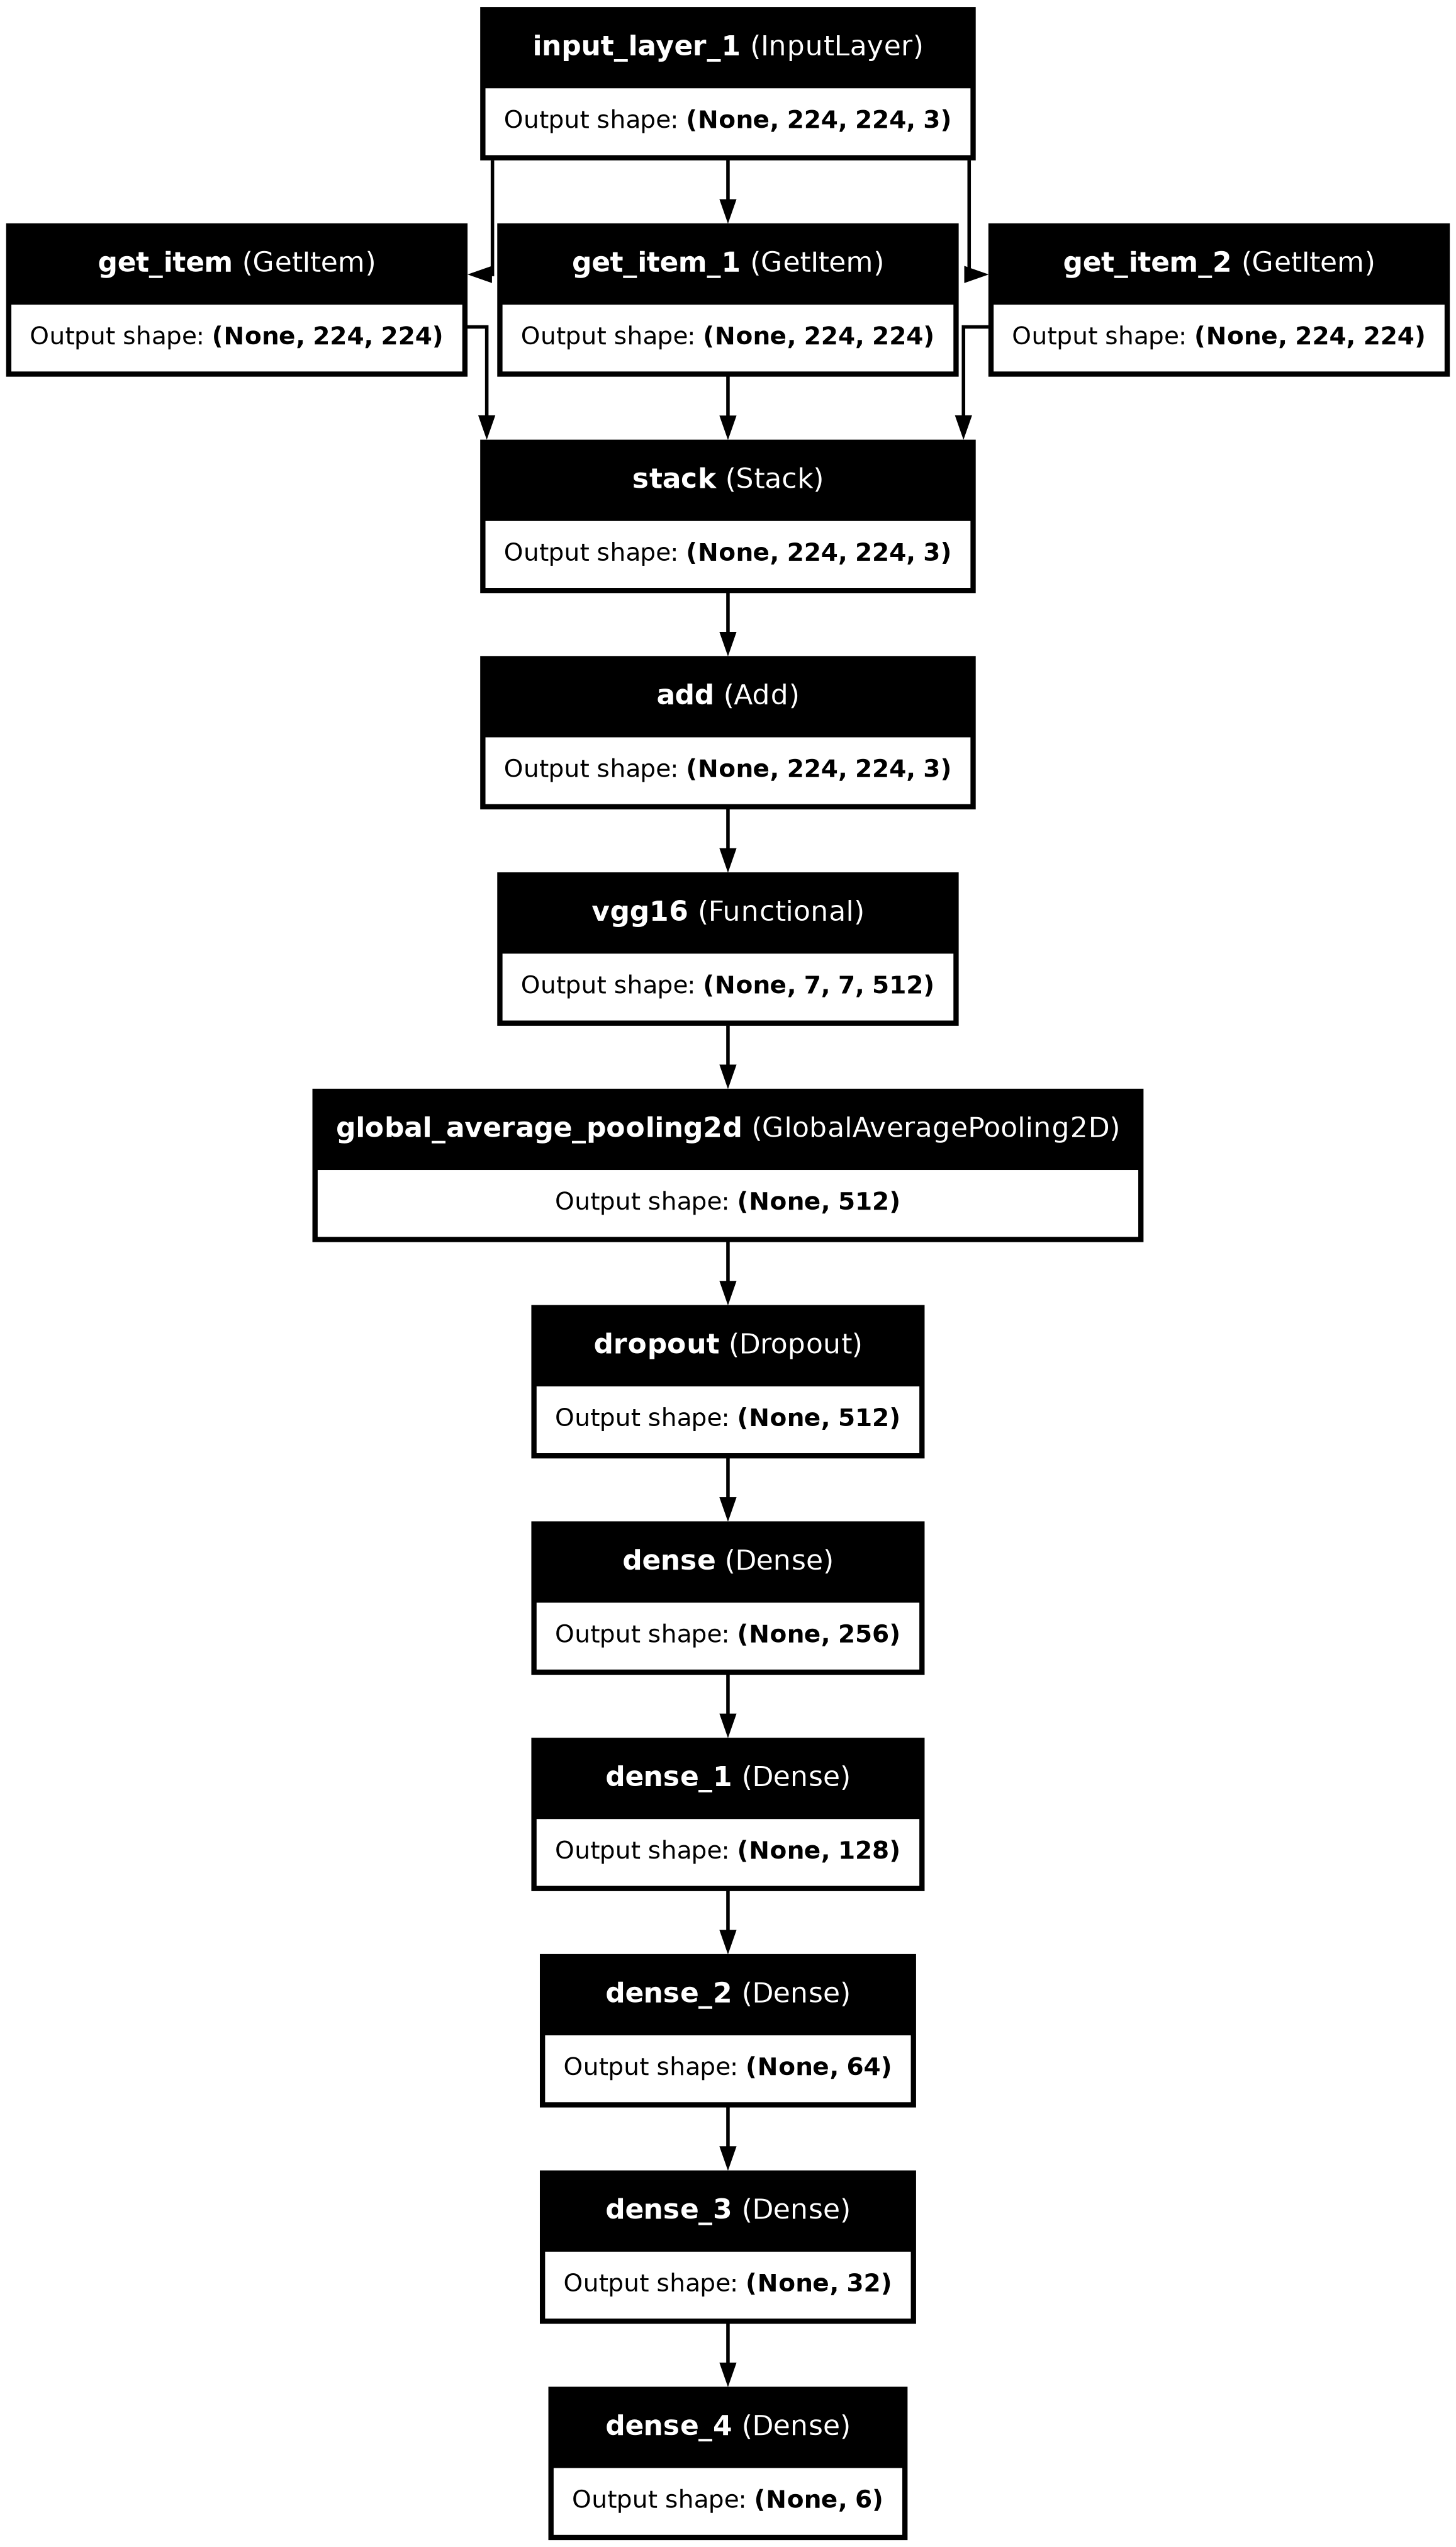

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='cnn_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
from keras.utils import to_categorical as tc
x_train=np.array(x_train)
y_train=np.array(y_train)
# y_train=tc(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
# y_test=tc(y_test)

In [14]:
epoch = 25
history=model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=epoch,)

Epoch 1/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 228s 10s/step - accuracy: 0.2580 - loss: 2.9996 - val_accuracy: 0.4682 - val_loss: 1.3855
Epoch 2/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 219s 10s/step - accuracy: 0.5113 - loss: 1.2949 - val_accuracy: 0.5896 - val_loss: 1.0044
Epoch 3/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 223s 10s/step - accuracy: 0.6098 - loss: 1.0171 - val_accuracy: 0.6301 - val_loss: 0.9753
Epoch 4/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 262s 10s/step - accuracy: 0.7027 - loss: 0.8872 - val_accuracy: 0.6936 - val_loss: 0.8284
Epoch 5/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 220s 10s/step - accuracy: 0.7207 - loss: 0.7957 - val_accuracy: 0.6590 - val_loss: 0.9765
Epoch 6/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 219s 10s/step - accuracy: 0.7638 - loss: 0.6387 - val_accuracy: 0.7168 - val_loss: 0.8468
Epoch 7/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 263s 10s/step - accuracy: 0.8084 - loss: 0.5939 - val_accuracy: 0.6821 - val_loss: 0.9377
Epoch 8/25
22/22 ━━━━━━━━━━━━━━━━━━━━ 262s 10s/step - accuracy: 0.8174 - loss: 0.5162 - val_accuracy: 0.

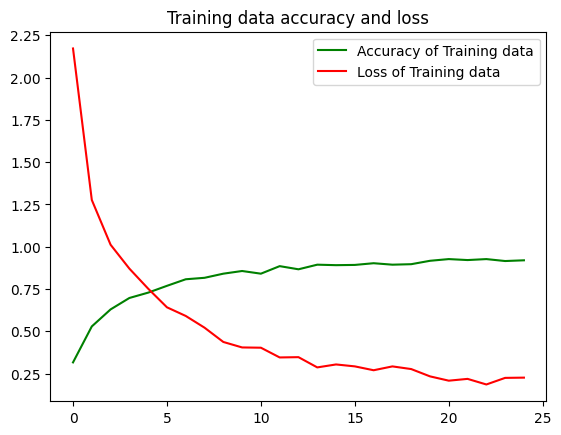

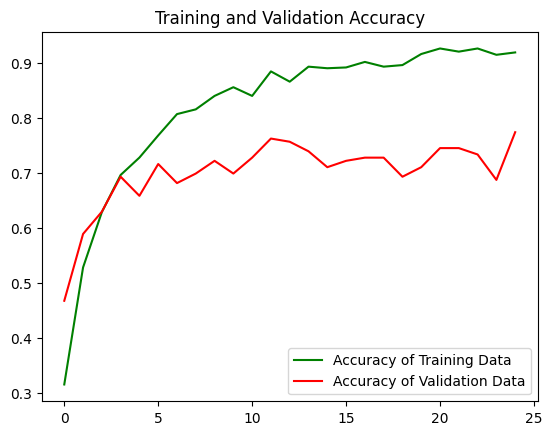

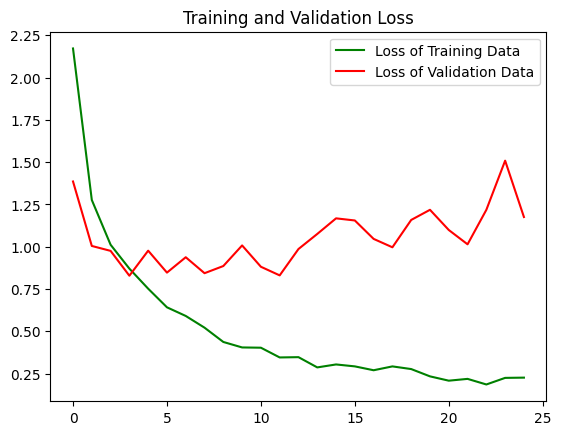

<Figure size 640x480 with 0 Axes>

In [15]:
get_ac = history.history['accuracy']
get_los = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 7s/step - accuracy: 0.7188 - loss: 1.7921
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


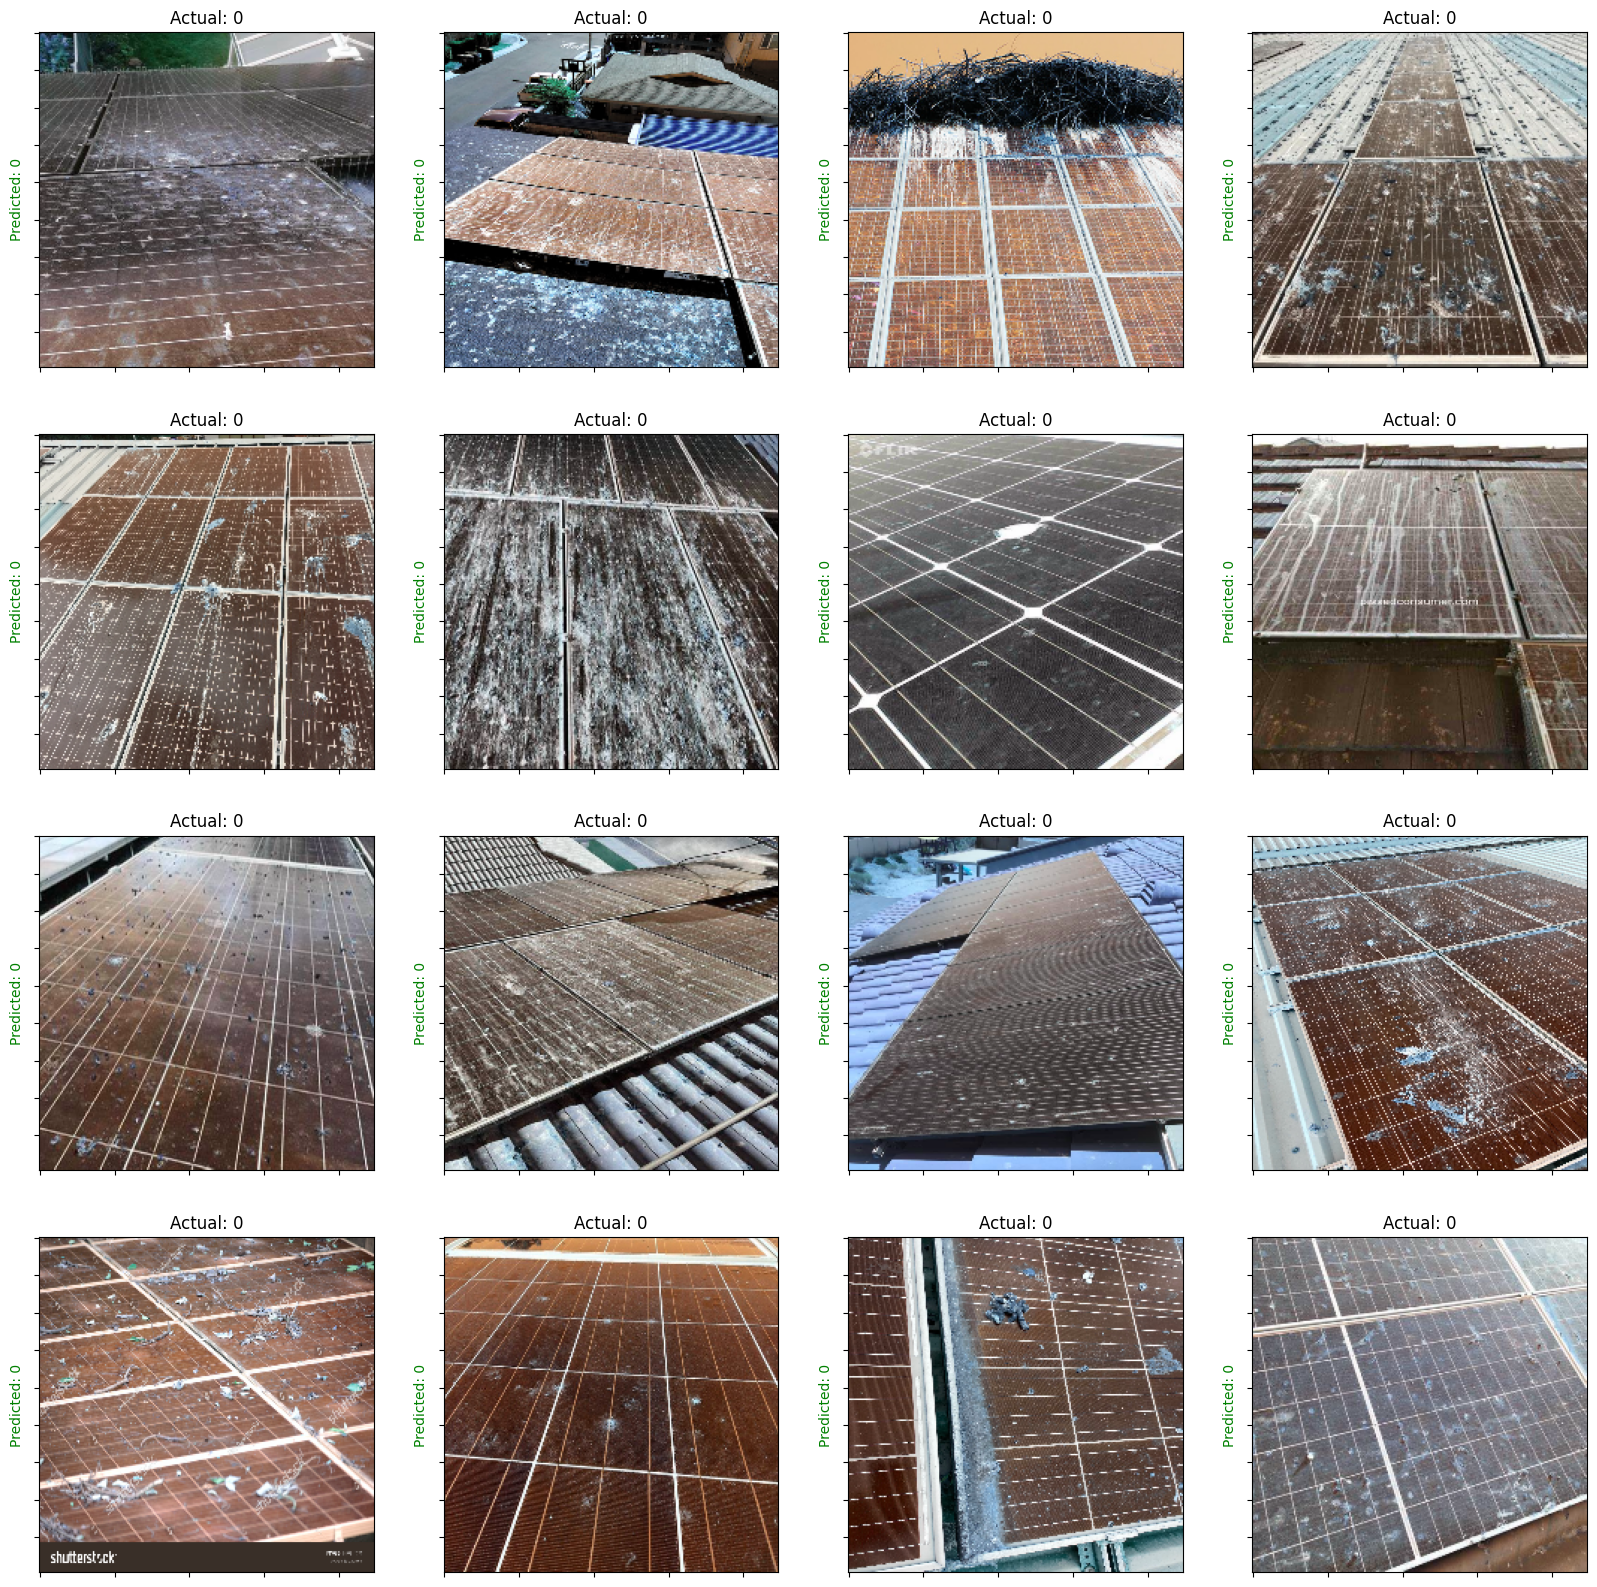

In [16]:
loss, accuracy = model.evaluate(x_test,y_test)

plt.figure(figsize=(20, 20))
# for images, labels in val_ds.take(1):
for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(x_test[i])
        predictions = model.predict(tf.expand_dims(x_test[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(y_test[i]==y_test[np.argmax(score)]):
            plt.title("Actual: "+str(y_test[i]))
            plt.ylabel("Predicted: "+str(y_test[np.argmax(score)]),fontdict={'color':'green'})
        else:
          plt.title("Actual: "+str(y_test[i]))
          plt.ylabel("Predicted: "+str(y_test[np.argmax(score)]),fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plot confusion matrix and other metrics
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 7s/step
Confusion Matrix:
[[25  4  5  0  1  2]
 [ 2 24 10  0  2  0]
 [ 3  5 30  0  0  0]
 [ 0  1  1 18  1  0]
 [ 0  1  0  0 13  0]
 [ 0  0  0  0  1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        37
           1       0.69      0.63      0.66        38
           2       0.65      0.79      0.71        38
           3       1.00      0.86      0.92        21
           4       0.72      0.93      0.81        14
           5       0.92      0.96      0.94        25

    accuracy                           0.77       173
   macro avg       0.80      0.81      0.80       173
weighted avg       0.79      0.77      0.77       173



6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step
Confusion Matrix:
[[25  4  5  0  1  2]
 [ 2 24 10  0  2  0]
 [ 3  5 30  0  0  0]
 [ 0  1  1 18  1  0]
 [ 0  1  0  0 13  0]
 [ 0  0  0  0  1 24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        37
           1       0.69      0.63      0.66        38
           2       0.65      0.79      0.71        38
           3       1.00      0.86      0.92        21
           4       0.72      0.93      0.81        14
           5       0.92      0.96      0.94        25

    accuracy                           0.77       173
   macro avg       0.80      0.81      0.80       173
weighted avg       0.79      0.77      0.77       173



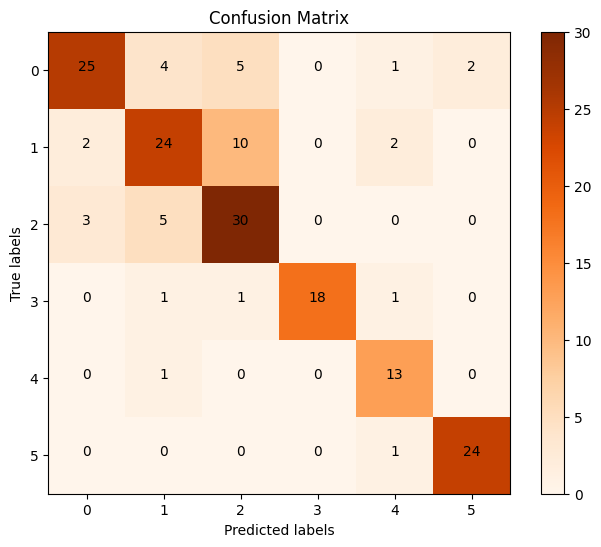

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Plot confusion matrix and other metrics
predictions = model.predict(x_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with annotations and color map
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')  # Using 'Oranges' colormap
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black")

plt.show()
